Question 1 : What is Ridge Regression, and how does it differ from ordinary least squares regression

Answer :

Ridge Regression is a linear regression technique used for dealing with multicollinearity, which occurs when predictor variables in a multiple regression model are highly correlated with each other. In Ridge Regression, a penalty term is added to the sum of squared errors, which helps to reduce the magnitude of the coefficients of highly correlated variables.

The penalty term in Ridge Regression is called the L2 regularization, which is represented by the square of the L2 norm of the coefficients. By adding the L2 regularization term to the ordinary least squares (OLS) objective function, Ridge Regression shrinks the coefficients of highly correlated variables towards zero, without completely eliminating them, which results in a better generalization performance of the model on unseen data.

In contrast, Ordinary Least Squares Regression (OLS) is a simple linear regression technique that aims to minimize the sum of squared errors between the predicted and actual values. OLS does not include any regularization term and assumes that the predictor variables are independent of each other. As a result, OLS may not perform well when multicollinearity is present, as it can lead to unstable and overfit models.
In summary, Ridge Regression is a regularized version of linear regression that helps to reduce multicollinearity and improves the performance of the model on unseen data, while OLS is a simple linear regression technique that does not account for multicollinearity and may not generalize well when it is present.

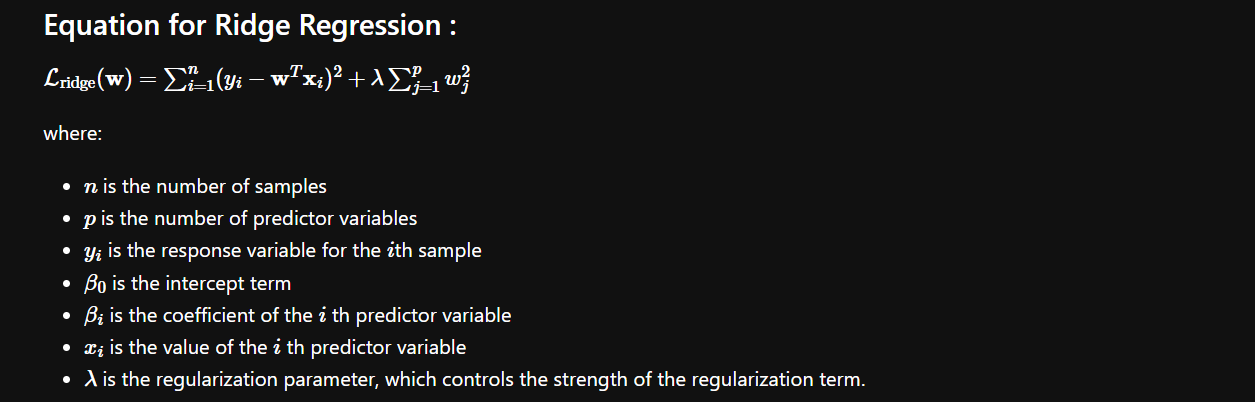

The first term in the equation represents the OLS objective function, which aims to minimize the sum of squared errors between the predicted and actual values. The second term is the regularization term, which is the L2 norm of the coefficients multiplied by the regularization parameter lambda. This term penalizes the model for having large coefficients and helps to reduce overfitting by shrinking the coefficient values towards zero.

Question 2 : What are the assumptions of Ridge Regression? 

Answer :

Ridge Regression is a linear regression technique that is based on the same underlying assumptions as Ordinary Least Squares (OLS) regression. In addition to these assumptions, Ridge Regression also assumes that:

- There is no perfect multicollinearity: Ridge Regression assumes that there is no perfect linear relationship between any of the predictor variables in the model. If there is perfect multicollinearity, the matrix of predictor variables will be singular and the regression coefficients will not be unique.

- The errors are normally distributed: Ridge Regression assumes that the errors are normally distributed with mean zero and constant variance. If the errors are not normally distributed, the model may be biased and inefficient.

- The errors are independent: Ridge Regression assumes that the errors are independent of each other. If the errors are correlated, the model may be inefficient and the standard errors of the coefficients may be underestimated.

- The relationship between the predictors and response is linear: Ridge Regression assumes that the relationship between the predictor variables and the response variable is linear. If the relationship is non-linear, Ridge Regression may not provide a good fit to the data.

- The model is correctly specified: Ridge Regression assumes that the model is correctly specified and includes all relevant predictor variables. If the model is misspecified, the estimates of the coefficients may be biased.

It is important to check these assumptions before using Ridge Regression and to assess whether the model is appropriate for the data at hand.

Question 3 : How do you select the value of the tuning parameter (lambda) in Ridge Regression?

Answer :

In Ridge Regression, the tuning parameter λ (lambda) controls the strength of regularization by penalizing large coefficients. Selecting an appropriate value of λ is crucial to balancing bias and variance in the model. Here’s how you can determine the optimal λ:

Methods for Selecting λ:

1. Cross-Validation (Most Common Approach)

- Use k-fold cross-validation (typically 5-fold or 10-fold) to test different values of λ.
- Select the λ that minimizes the cross-validation error.

2. Grid Search

- Define a range of λ values (e.g., logarithmic scale from 10^−4 to 10^4).
- Train the Ridge model for each λ and choose the best-performing one based on validation error.

3. Generalized Cross-Validation (GCV)

- A special form of leave-one-out cross-validation that is computationally efficient.
- Some implementations (e.g., RidgeCV in sklearn) use this method.

4. Bayesian Optimization

- Uses probabilistic models to find the optimal λ efficiently instead of trying all values.

5. Empirical Rule of Thumb

- Start with λ = 1 and adjust based on model performance.
- If coefficients are too small (high bias), decrease λ.
- If overfitting occurs (high variance), increase λ.

InSummary,

- Too small λ → Overfitting (high variance, low bias)
- Too large λ → Underfitting (high bias, low variance)
- Cross-validation is the best way to find an optimal λ.

In [5]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import numpy as np
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

# Generate synthetic regression data
X, y = make_regression(n_samples=100, n_features=10, noise=0.1, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define lambda values (regularization strengths)
lambdas = np.logspace(-4, 4, 50)

# Perform cross-validation
ridge_cv = RidgeCV(alphas=lambdas, store_cv_values=True)
ridge_cv.fit(X_train, y_train)

# Optimal lambda
optimal_lambda = ridge_cv.alpha_
print(f"Optimal lambda: {optimal_lambda}")


Optimal lambda: 0.0001


c:\Users\Hansika\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(


Question 4 : Can Ridge Regression be used for feature selection? If yes, how?

Answer :

Yes, Ridge Regression can be used for feature selection by shrinking the coefficients of less important features towards zero. The shrinkage effect of Ridge Regression is proportional to the magnitude of the coefficients, so features with smaller coefficients will be more heavily penalized and tend to be reduced to zero. This results in a subset of the most important features being selected and the less important features being excluded from the model.

To use Ridge Regression for feature selection, the first step is to standardize the predictor variables to have zero mean and unit variance. This is important because Ridge Regression is sensitive to the scale of the predictor variables, and standardizing them ensures that the regularization penalty is applied equally to all variables.

The second step is to fit a Ridge Regression model with a range of values for the tuning parameter, lambda, using cross-validation or another method for selecting the optimal value of lambda. The Ridge Regression coefficients are then obtained for each value of lambda, and the magnitude of the coefficients can be used to rank the importance of the predictor variables.
Finally, a subset of the most important variables can be selected by choosing a threshold for the coefficient magnitudes, or by using a feature selection algorithm that takes into account the coefficients obtained from Ridge Regression.

It is important to note that Ridge Regression may not always select the optimal subset of predictor variables, as it tends to shrink all coefficients towards zero to some extent. Other feature selection methods, such as Lasso Regression or Elastic Net Regression, may be more suitable for selecting sparse subsets of predictor variables that are most relevant for predicting the response variable.

Question 5 : How does the Ridge Regression model perform in the presence of multicollinearity?

Answer :

Ridge Regression can perform well in the presence of multicollinearity, which occurs when there is a high degree of correlation among the predictor variables in a regression model. Multicollinearity can lead to unstable estimates of the regression coefficients and can make it difficult to interpret the effects of individual predictor variables on the response variable.

In Ridge Regression, the penalty term added to the sum of squared residuals is proportional to the square of the L2 norm of the regression coefficients, which shrinks the coefficients towards zero and reduces the impact of multicollinearity on the estimation of the coefficients. This means that Ridge Regression can help to stabilize the estimates of the regression coefficients and reduce the variance of the estimates.

However, Ridge Regression does not completely eliminate the problem of multicollinearity, as it only reduces the impact of multicollinearity by shrinking the coefficients towards zero. If the degree of multicollinearity is very high, Ridge Regression may still produce biased and unstable estimates of the coefficients. In such cases, it may be necessary to use other methods, such as principal component regression, partial least squares regression, or variance inflation factor analysis, to deal with multicollinearity.

In summary, Ridge Regression can be a useful technique for dealing with multicollinearity in linear regression models, as it helps to stabilize the estimates of the regression coefficients and reduce the variance of the estimates. However, it is important to evaluate the degree of multicollinearity in the data and to use appropriate methods for dealing with multicollinearity if Ridge Regression does not provide adequate solutions.

Question 6 : Can Ridge Regression handle both categorical and continuous independent variables?

Answer :

Yes, Ridge Regression can handle both categorical and continuous independent variables. However, the categorical variables must be transformed into a numerical format before they can be used in the model.

One common approach for encoding categorical variables is to use binary encoding or one-hot encoding, which creates a set of binary variables corresponding to the categories of the categorical variable. For example, if a categorical variable has three categories, the binary encoding would create three binary variables, each indicating whether the observation belongs to one of the three categories.

Once the categorical variables have been transformed into a numerical format, they can be included in the Ridge Regression model along with the continuous variables. The Ridge Regression model will then estimate the coefficients for each predictor variable, including both the continuous and categorical variables.

It is important to note that the choice of encoding method can have an impact on the performance of the Ridge Regression model, and it may be necessary to experiment with different encoding methods to determine the most appropriate one for the data. In addition, the regularization parameter, lambda, should be chosen carefully to balance the trade-off between bias and variance in the model.

Question 7 : How do you interpret the coefficients of Ridge Regression?

Answer :

Interpreting the coefficients of Ridge Regression can be a bit more challenging than in Ordinary Least Squares (OLS) regression due to the penalty term that is added to the least squares objective function. The coefficients obtained from Ridge Regression represent the estimated effect of each predictor variable on the response variable, taking into account the degree of multicollinearity and the regularization penalty.

The magnitude and sign of the coefficients obtained from Ridge Regression can still provide information about the importance and direction of the effects of the predictor variables on the response variable. However, the interpretation of the coefficients is affected by the regularization penalty and can be influenced by the scaling of the predictor variables.

One common way to interpret the coefficients of Ridge Regression is to look at their relative magnitudes and signs. Coefficients with larger magnitudes are assumed to have a stronger effect on the response variable than coefficients with smaller magnitudes. The sign of the coefficient indicates the direction of the effect, i.e., whether the variable has a positive or negative effect on the response variable. 

It is also important to note that the interpretation of the coefficients in Ridge Regression may differ from OLS regression because the regularization penalty can shrink some of the coefficients towards zero. Therefore, some coefficients that would have been significant in OLS regression may not be significant in Ridge Regression.

In summary, interpreting the coefficients of Ridge Regression requires careful consideration of the degree of multicollinearity, the regularization penalty, and the scaling of the predictor variables. The magnitude and sign of the coefficients can still provide useful information about the importance and direction of the effects of the predictor variables on the response variable, but caution should be exercised when interpreting the coefficients due to the regularization penalty.

Question 8 : Can Ridge Regression be used for time-series data analysis? If yes, how?

Answer :

Ridge Regression can be used for time-series data analysis when the dependent variable (i.e., the response variable) is continuous and the predictor variables (i.e., the independent variables) are either continuous or categorical. However, Ridge Regression assumes that the observations are independent of each other, which may not be true for time-series data where the observations are often correlated over time.

One way to apply Ridge Regression to time-series data is to use a rolling window approach, where the data is divided into smaller subsets and the Ridge Regression model is fit to each subset separately. This approach can be used to capture changes in the relationship between the predictor variables and the response variable over time.

Another approach is to use autoregressive models or other time-series models that can capture the temporal dependencies between the observations. These models can be combined with Ridge Regression to incorporate the regularization penalty and avoid overfitting.

In addition, it may be necessary to preprocess the time-series data by removing trends, seasonality, or other patterns that may affect the relationship between the predictor variables and the response variable. This can be done using techniques such as differencing, detrending, or seasonal adjustment.

Overall, Ridge Regression can be used for time-series data analysis, but careful consideration should be given to the specific characteristics of the data and the appropriate preprocessing and modeling techniques should be selected to account for the temporal dependencies between the observations.